Dual Moving Average Crossover Strategy to buy and sell stock

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
uploaded =  files.upload()

Saving AAPL.csv to AAPL.csv


In [ ]:
AAPL = pd.read_csv('AAPL.csv')
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.714512,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,24.018265,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,24.020523,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.357344,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.293207,237458000
...,...,...,...,...,...,...,...
1836,2022-04-19,165.020004,167.820007,163.910004,167.399994,167.399994,67723800
1837,2022-04-20,168.759995,168.880005,166.100006,167.229996,167.229996,67929800
1838,2022-04-21,168.910004,171.529999,165.910004,166.419998,166.419998,87227800
1839,2022-04-22,166.460007,167.869995,161.500000,161.789993,161.789993,84775200


<function matplotlib.pyplot.show>

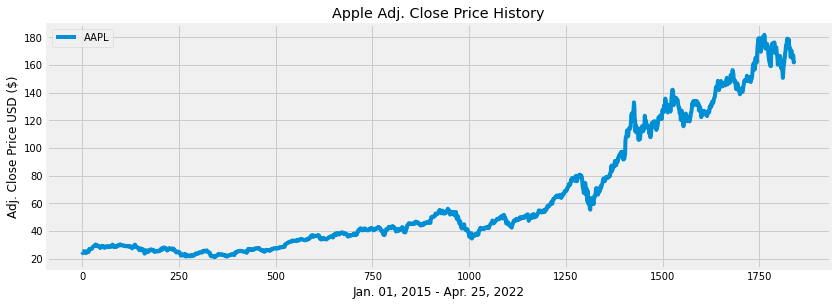

In [ ]:
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL['Adj Close'], label='AAPL')
plt.title('Apple Adj. Close Price History')
plt.xlabel('Jan. 01, 2015 - Apr. 25, 2022')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show

In [ ]:
#Create the simple moving average with a 30 day window
SMA30 = pd.DataFrame()
SMA30['Adj Close Price'] = AAPL['Adj Close'].rolling(window = 30).mean()
SMA30

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1836,167.570667
1837,167.897000
1838,168.012667
1839,168.121666


In [ ]:
#Create a simple moving 100 days average
SMA100 = pd.DataFrame()
SMA100['Adj Close Price'] = AAPL['Adj Close']. rolling(window=100).mean()
SMA100

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1836,169.213631
1837,169.268592
1838,169.366687
1839,169.384226


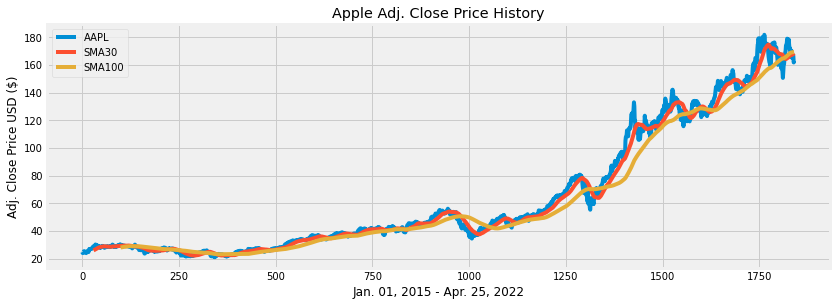

In [ ]:
#visualize
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL['Adj Close'], label='AAPL')
plt.plot(SMA30['Adj Close Price'], label = 'SMA30')
plt.plot(SMA100['Adj Close Price'], label = 'SMA100')
plt.title('Apple Adj. Close Price History')
plt.xlabel('Jan. 01, 2015 - Apr. 25, 2022')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#create new dataframe to store all the data
data = pd.DataFrame()
data['AAPL'] = AAPL['Adj Close']
data['SMA30'] = SMA30['Adj Close Price']
data['SMA100'] = SMA100['Adj Close Price']
data

,AAPL,SMA30,SMA100
0,24.714512,NaN,NaN
1,24.018265,NaN,NaN
2,24.020523,NaN,NaN
3,24.357344,NaN,NaN
4,25.293207,NaN,NaN
...,...,...,...
1836,167.399994,167.570667,169.213631
1837,167.229996,167.897000,169.268592
1838,166.419998,168.012667,169.366687
1839,161.789993,168.121666,169.384226


In [ ]:
#craete a functiono to signal when to buy and sell theh asset/stock
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['AAPL'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['AAPL'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
    
  return(sigPriceBuy, sigPriceSell)

In [ ]:
#Store the buy and sell data into a variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [ ]:
#show the data
data

,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,24.714512,NaN,NaN,NaN,NaN
1,24.018265,NaN,NaN,NaN,NaN
2,24.020523,NaN,NaN,NaN,NaN
3,24.357344,NaN,NaN,NaN,NaN
4,25.293207,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1836,167.399994,167.570667,169.213631,NaN,NaN
1837,167.229996,167.897000,169.268592,NaN,NaN
1838,166.419998,168.012667,169.366687,NaN,NaN
1839,161.789993,168.121666,169.384226,NaN,NaN


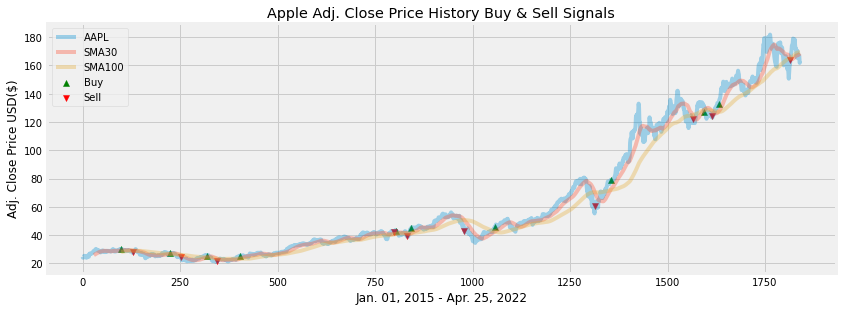

In [ ]:
#visualize teh data and strategy 
plt.figure(figsize=(12.6, 4.6))
plt.plot(data['AAPL'], label = 'AAPL', alpha = 0.35)
plt.plot(data['SMA30'], label = "SMA30", alpha = 0.35)
plt.plot(data['SMA100'], label = "SMA100", alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('Apple Adj. Close Price History Buy & Sell Signals')
plt.xlabel('Jan. 01, 2015 - Apr. 25, 2022')
plt.ylabel('Adj. Close Price USD($)')
plt.legend(loc='upper left')
plt.show()